In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import get_fin_data as gfd
from pairs_methods import distance_approach as dist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtest 
import data_base as db
import os

In [4]:
petr = gfd.get_close_price("PETR4.SA", "2021-01-01")
print(petr.head())

[*********************100%***********************]  1 of 1 completed
Date
2021-01-04    13.732214
2021-01-05    14.268961
2021-01-06    14.297461
2021-01-07    14.724960
2021-01-08    14.781960
Name: Adj Close, dtype: float64


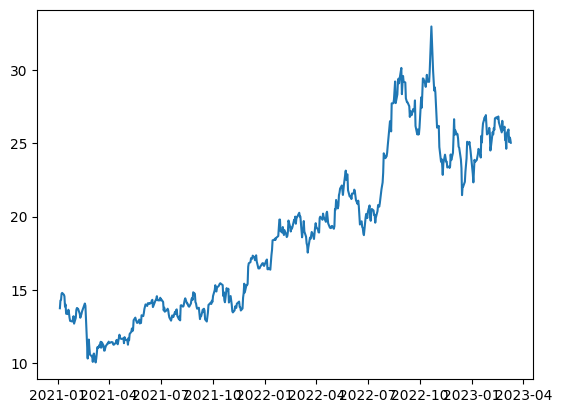

In [5]:
fig, ax = plt.subplots()
ax.plot(petr.index, petr)
plt.show()

In [23]:
# create random series to simulate and test functions

x = np.random.randn(375)/100
x = np.cumprod(1 + x)
x *= 5
x = pd.Series(x)

y = np.random.randn(375)/100
y = np.cumprod(1 + y) 
y *= 6
y = pd.Series(y)


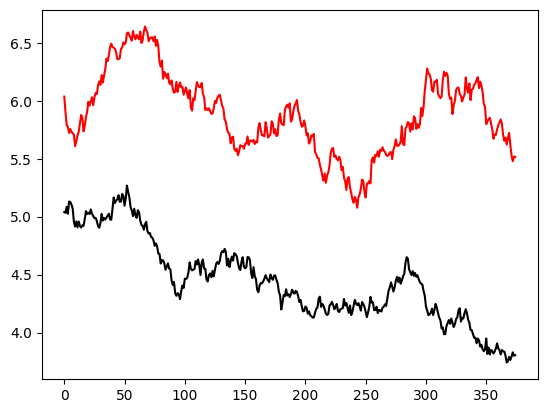

In [24]:
### plot series
fig, ax = plt.subplots()
ax.plot(x.index, x, color="black")
ax.plot(y.index, y, color="red")
plt.show()

In [25]:
x_train, x_test = backtest.split_train_test(x, 0.7)
y_train, y_test = backtest.split_train_test(y, 0.7)


In [26]:
x_train_norm, x_test_norm = dist.normalize_series(x_train, x_test)
y_train_norm, y_test_norm = dist.normalize_series(y_train, y_test)




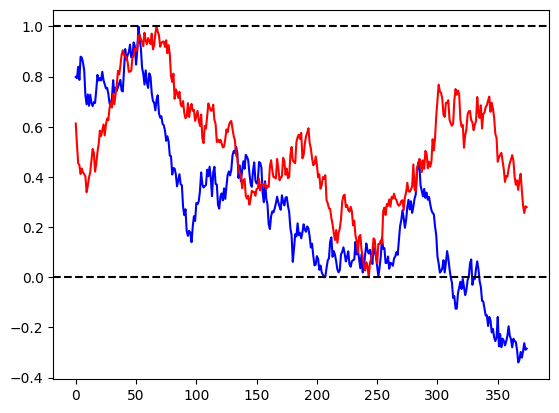

In [27]:
x_train_test_norm = pd.concat([x_train_norm, x_test_norm], axis=0)
y_train_test_norm = pd.concat([y_train_norm, y_test_norm], axis=0)

fig, ax = plt.subplots()
ax.plot(x_train_test_norm, color="blue")
ax.plot(y_train_test_norm, color="red")
ax.axhline(0, color="black", linestyle="dashed")
ax.axhline(1, color="black", linestyle="dashed")
plt.show()

In [30]:
spread_train = dist.spread_distance(x_train_norm, y_train_norm)
spread_test = dist.spread_distance(x_test_norm, y_test_norm)

z_score_train, z_score_test = dist.Z_score(spread_train, spread_test)
z_score_train_test = pd.concat([z_score_train, z_score_test], axis=0)


signal = backtest.generate_signal(z_score_train_test, 1, 0)


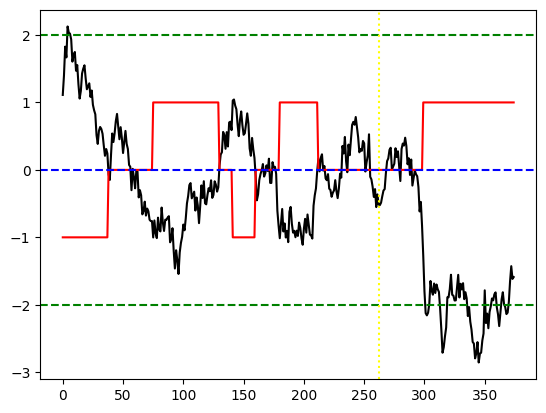

In [31]:

fig, ax = plt.subplots()
ax.plot(z_score_train_test, color="black")
ax.plot(signal, color='red')
ax.axhline(0, color="blue", linestyle="dashed")
ax.axhline(2, color="green", linestyle="dashed")
ax.axhline(-2, color="green", linestyle="dashed")
ax.axvline(len(z_score_train_test)*0.7, color="yellow", linestyle="dotted")
plt.show()

In [41]:
x_rtn = backtest.calculate_stock_return(x)
y_rtn = backtest.calculate_stock_return(y)

trade_return = backtest.calculate_trade_return(signal, x_rtn, y_rtn)

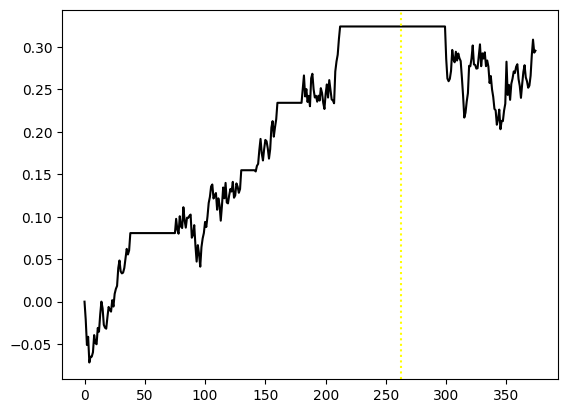

In [43]:
cum_trade_return = np.cumsum(trade_return)

fig, ax = plt.subplots()
ax.plot(cum_trade_return, color="black")
ax.axvline(len(z_score_train_test)*0.7, color="yellow", linestyle="dotted")
plt.show()
        